Emulate Ranganathan's paper, [Setting development goals using stochastic dynamical system models](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0171560). Figure 5c.

Equations from [this section](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0171560#sec005).

### Import Modules

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import pandas as pd

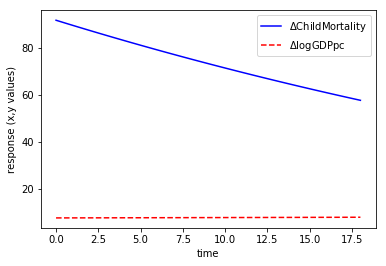

In [2]:
# function that returns [dC,dG]
def model(p,t):
    # implement the equations from the paper
    dcdt = 0.439*p[0] - 0.0354*p[0]*p[1] - 1.47*p[0]/p[1]# + noise2
    dgdt = -16.8/p[0] + 95.7/(p[1]*p[0]) + 0.732*p[1]/p[0]# + noise1
    return [dcdt,dgdt]

# initial condition - India in 2000: child mortality and GDP per capita, PPP current $
p0 = [91.6,np.log(2156.69)]

# time points
t = np.linspace(0,18)

# solve ODE
p = odeint(model,p0,t)

# plot results
plt.plot(t,p[:,0],'b-',label=r'$\Delta$ChildMortality')
plt.plot(t,p[:,1],'r--',label=r'$\Delta$logGDPpc')
plt.ylabel('response (x,y values)')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Compare child mortality against true data

In [3]:
wb_child_mortality = pd.read_csv('data/new/wb_child_mortality.csv', encoding="ISO-8859-1",index_col='Country Name')
wb_child_mortality = wb_child_mortality.iloc[:,3:].transpose()
wb_child_mortality.index = wb_child_mortality.index.astype(int)

In [4]:
wb_child_mortality.head()

Country Name,Aruba,Afghanistan,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,American Samoa,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,NaN,NaN,NaN,NaN,NaN,199.5,NaN,NaN,NaN,...,NaN,NaN,153.7,NaN,NaN,NaN,NaN,NaN,205.6,151.0
1961,NaN,350.9,NaN,NaN,NaN,NaN,189.4,NaN,NaN,NaN,...,NaN,NaN,149.7,NaN,NaN,NaN,NaN,NaN,201.6,146.9
1962,NaN,345.3,NaN,NaN,NaN,NaN,179.7,NaN,NaN,NaN,...,NaN,NaN,145.5,NaN,NaN,NaN,409.4,NaN,197.9,142.5
1963,NaN,340.1,NaN,NaN,NaN,NaN,169.8,NaN,NaN,NaN,...,NaN,NaN,141.1,NaN,NaN,NaN,402.0,NaN,194.7,137.9
1964,NaN,334.9,NaN,NaN,NaN,NaN,159.5,NaN,NaN,NaN,...,NaN,85.5,136.6,NaN,NaN,NaN,393.9,NaN,192.1,133.5


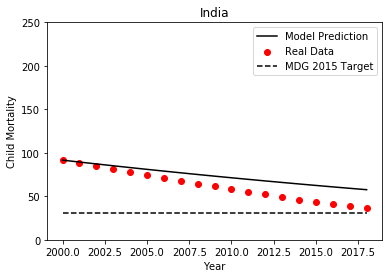

In [5]:
# real data
india_1990_onwards = wb_child_mortality.loc[2000:,'India']
plt.scatter(list(india_1990_onwards.index),list(india_1990_onwards),color='r',label=r'Real Data')
# 2015 target (1/3 of 1990 value)
plt.hlines(india_1990_onwards[2000]/3,2000,2018,color='k',linestyles='dashed',label='MDG 2015 Target')
# predictions
plt.plot(np.array(t)+2000,p[:,0],'k',label=r'Model Prediction')

plt.ylabel('Child Mortality')
plt.xlabel('Year')
plt.title('India')
plt.ylim(0,250)
plt.legend()
plt.savefig('outputs/figs_modelling/ODE_india.png',dpi=200)
plt.show()

We can see that this is very close to the India figure from the paper (no stochastic changes in our implementation).


<img src="https://journals.plos.org/plosone/article/figure/image?size=large&id=10.1371/journal.pone.0171560.g005" width="800" height="400">